# Data collection

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
r = requests.get('https://www.yelp.com/biz/tesla-san-francisco?osq=Tesla+Dealership')
r.status_code

200

In [13]:
import re

In [14]:
soup = BeautifulSoup(r.text,'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p',{'class':regex})
reviews = [r.text for r in results]

In [16]:
reviews

["Best service center. The team is very responsive, knowledgeable & friendly. I've visited for glass, filters, tires, front upper control arms, radar & more; always high-quality & lasting repairs, with clear explanations provided.",
 'I went here today to get my front two tires replaced. Tesla\'s are amazing vehicles, certainly I don\'t have any problems with the vehicle itself. It\'s the men working the tire department. I went there and my whole time being there I felt pressured and forced. First an older guy came up to me and checked my front passenger tire out and said it would last a little while more, so a replacement wasn\'t necessary. Then another gentleman came and was extremely hyper, literally running around and tweaking the whole time. Dude came and checked all 4 of my tires in like 10 seconds max and said I needed 4 tires. Which I agreed with him because I myself knew I needed all 4 to be replaced. Then I\'m assuming the "manager" there was also extremely forceful and made 

# Analysing Data

In [17]:
import pandas as pd
import numpy as np

In [21]:
df = pd.DataFrame(np.array(reviews), columns = ['review'])

In [22]:
df.head()

,review
0,Best service center. The team is very responsi...
1,I went here today to get my front two tires re...
2,I waited for 25 mins and no one even acknowled...
3,I was very nervous about coming back to this T...
4,Delivery and customer service experience is be...


In [23]:
len(df['review'])

11

In [26]:
df['word_count'] = df['review'].apply(lambda x : len(x.split()))

In [29]:
df['char_count'] = df['review'].apply(lambda x: len(x))

In [31]:
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words)/len(words)
    

In [32]:
df['average_word_length'] = df['review'].apply(lambda x: average_words(x))

In [34]:
from nltk.corpus import stopwords

In [35]:
stop_words = stopwords.words('english')

In [37]:
len(stop_words)

179

In [38]:
df['stopword_count'] = df['review'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [40]:
df['stopword_rate'] = df['stopword_count']/df['word_count']

In [41]:
df.sort_values(by = 'stopword_rate')

,review,word_count,char_count,average_word_length,stopword_count,stopword_rate
0,Best service center. The team is very responsi...,33,228,5.939394,5,0.151515
9,I took back my 2018 Model 3 last month for saf...,49,270,4.530612,15,0.306122
5,Slow and inhospitable. It should never take 3 ...,25,136,4.480000,9,0.360000
8,Classic sales person technique. Text you to co...,86,439,4.104651,36,0.418605
10,"My model 3 got punctured on monday, slow leak ...",113,609,4.398230,48,0.424779
1,I went here today to get my front two tires re...,273,1472,4.395604,126,0.461538
6,Went here for repair after noticing a little g...,132,742,4.628788,61,0.462121
4,Delivery and customer service experience is be...,51,296,4.823529,24,0.470588
7,In a nutshell: Tesla sucks! I leased one of th...,136,734,4.404412,65,0.477941
3,I was very nervous about coming back to this T...,76,401,4.289474,39,0.513158


In [42]:
df.describe()

,word_count,char_count,average_word_length,stopword_count,stopword_rate
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,93.909091,509.545455,4.520319,41.727273,0.415617
std,70.412292,378.521430,0.549149,34.144080,0.108478
min,25.000000,136.000000,3.728814,5.000000,0.151515
25%,50.000000,274.000000,4.342539,19.500000,0.389302
50%,76.000000,401.000000,4.404412,36.000000,0.461538
75%,122.500000,671.500000,4.579700,54.500000,0.474265
max,273.000000,1472.000000,5.939394,126.000000,0.525424


# Data Cleaning

In [44]:
df['lowercase'] = df['review'].apply(lambda x : ' '.join(word.lower() for word in x.split()))

### Removing punctuation

In [48]:
df['punctuation'] = df['lowercase'].str.replace('[^\w\s]','')

/var/folders/bz/9s4mdqhj1ys8_bmyym5162tw0000gn/T/ipykernel_15099/4175363168.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['punctuation'] = df['lowercase'].str.replace('[^\w\s]','')


### Removing stopwords

In [52]:
df['stopwords'] = df['punctuation'].apply(lambda x:' '.join(word for word in x.split() if word not in stop_words))

### Checking for the most frequently occured words

In [57]:
pd.Series(' '.join(df['stopwords']).split()).value_counts()[:30]

service       12
tire           8
4              7
tesla          7
one            7
tires          7
went           6
even           5
new            5
car            5
location       4
get            4
back           4
time           4
came           4
said           4
model          4
center         4
drive          4
nothing        4
also           3
month          3
another        3
take           3
extremely      3
needed         3
whole          3
literally      3
3              3
department     3
dtype: int64

In [59]:
other_stopwords = ['said','get','also','3','went','came','also','4','even','month','literally','center']

In [60]:
df['clean_review'] = df['stopwords'].apply(lambda x: ' '.join(word for word in x.split() if word not in other_stopwords))

### Lemmatization

In [63]:
from textblob import Word

In [67]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anishachitturu/nltk_data...


True

df['lemmatized'] = df['clean_review'].apply(lambda x:' '.join( Word(word).lemmatize() for word in x.split()))

In [70]:
df.head()

,review,word_count,char_count,average_word_length,stopword_count,stopword_rate,lowercase,punctuation,stopwords,clean_review,lemmatized
0,Best service center. The team is very responsi...,33,228,5.939394,5,0.151515,best service center. the team is very responsi...,best service center the team is very responsiv...,best service center team responsive knowledgea...,best service team responsive knowledgeable fri...,best service team responsive knowledgeable fri...
1,I went here today to get my front two tires re...,273,1472,4.395604,126,0.461538,i went here today to get my front two tires re...,i went here today to get my front two tires re...,went today get front two tires replaced teslas...,today front two tires replaced teslas amazing ...,today front two tire replaced tesla amazing ve...
2,I waited for 25 mins and no one even acknowled...,59,278,3.728814,31,0.525424,i waited for 25 mins and no one even acknowled...,i waited for 25 mins and no one even acknowled...,waited 25 mins one even acknowledged show room...,waited 25 mins one acknowledged show room walk...,waited 25 min one acknowledged show room walke...
3,I was very nervous about coming back to this T...,76,401,4.289474,39,0.513158,i was very nervous about coming back to this t...,i was very nervous about coming back to this t...,nervous coming back tesla location due poor se...,nervous coming back tesla location due poor se...,nervous coming back tesla location due poor se...
4,Delivery and customer service experience is be...,51,296,4.823529,24,0.470588,delivery and customer service experience is be...,delivery and customer service experience is be...,delivery customer service experience beyond ho...,delivery customer service experience beyond ho...,delivery customer service experience beyond ho...


## Sentiment Analysis

In [77]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [80]:
from textblob import TextBlob

In [83]:
df['polarity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])

In [84]:
df['subjectivity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

In [87]:
df.head()

,review,word_count,char_count,average_word_length,stopword_count,stopword_rate,lowercase,punctuation,stopwords,clean_review,lemmatized,polarity,subjectivity
0,Best service center. The team is very responsi...,33,228,5.939394,5,0.151515,best service center. the team is very responsi...,best service center the team is very responsiv...,best service center team responsive knowledgea...,best service team responsive knowledgeable fri...,best service team responsive knowledgeable fri...,0.295000,0.236667
1,I went here today to get my front two tires re...,273,1472,4.395604,126,0.461538,i went here today to get my front two tires re...,i went here today to get my front two tires re...,went today get front two tires replaced teslas...,today front two tires replaced teslas amazing ...,today front two tire replaced tesla amazing ve...,0.018309,0.505693
2,I waited for 25 mins and no one even acknowled...,59,278,3.728814,31,0.525424,i waited for 25 mins and no one even acknowled...,i waited for 25 mins and no one even acknowled...,waited 25 mins one even acknowledged show room...,waited 25 mins one acknowledged show room walk...,waited 25 min one acknowledged show room walke...,-0.081818,0.450000
3,I was very nervous about coming back to this T...,76,401,4.289474,39,0.513158,i was very nervous about coming back to this t...,i was very nervous about coming back to this t...,nervous coming back tesla location due poor se...,nervous coming back tesla location due poor se...,nervous coming back tesla location due poor se...,0.059375,0.296875
4,Delivery and customer service experience is be...,51,296,4.823529,24,0.470588,delivery and customer service experience is be...,delivery and customer service experience is be...,delivery customer service experience beyond ho...,delivery customer service experience beyond ho...,delivery customer service experience beyond ho...,-0.075000,0.728472


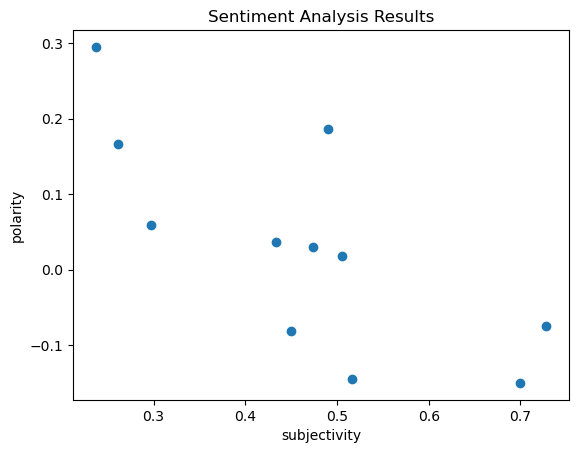

In [91]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Create a scatter plot of the sentiment scores
plt.scatter(df['subjectivity'], df['polarity'])
plt.xlabel("subjectivity")
plt.ylabel("polarity")
plt.title("Sentiment Analysis Results")
plt.show()


In [92]:
df.describe()

,word_count,char_count,average_word_length,stopword_count,stopword_rate,polarity,subjectivity
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,93.909091,509.545455,4.520319,41.727273,0.415617,0.030989,0.462927
std,70.412292,378.521430,0.549149,34.144080,0.108478,0.141762,0.158985
min,25.000000,136.000000,3.728814,5.000000,0.151515,-0.150000,0.236667
25%,50.000000,274.000000,4.342539,19.500000,0.389302,-0.078409,0.365104
50%,76.000000,401.000000,4.404412,36.000000,0.461538,0.030640,0.473737
75%,122.500000,671.500000,4.579700,54.500000,0.474265,0.113021,0.510763
max,273.000000,1472.000000,5.939394,126.000000,0.525424,0.295000,0.728472
